In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import psycopg2

In [2]:
conn=psycopg2.connect(
    host="localhost",
    database="Consumer Goods Adhoc Insights",
    user="postgres",
    password="Password")

In [3]:
cur=conn.cursor()

In [4]:
cur.execute("SELECT * FROM dim_customer")
rows = cur.fetchall()

In [5]:
dim_customer = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
print(dim_customer)

     customer_code               customer        platform   channel  \
0         70002017        Atliq Exclusive  Brick & Mortar    Direct   
1         70002018          Atliq e Store      E-Commerce    Direct   
2         70003181        Atliq Exclusive  Brick & Mortar    Direct   
3         70003182          Atliq e Store      E-Commerce    Direct   
4         70004069        Atliq Exclusive  Brick & Mortar    Direct   
..             ...                    ...             ...       ...   
204       90024183  Electricalsbea Stores  Brick & Mortar  Retailer   
205       90024184                Amazon       E-Commerce  Retailer   
206       90025209  Electricalsbea Stores  Brick & Mortar  Retailer   
207       90026205                Amazon       E-Commerce  Retailer   
208       90027207                Amazon       E-Commerce  Retailer   

        market sub_zone region  
0        India    India   APAC  
1        India    India   APAC  
2    Indonesia      ROA   APAC  
3    Indonesia 

In [6]:
cur.execute("SELECT * FROM dim_product")
rows = cur.fetchall()
dim_product = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
print(dim_product)

    product_code division      segment        category  \
0    A0118150101    P & A  Peripherals    Internal HDD   
1    A0118150102    P & A  Peripherals    Internal HDD   
2    A0118150103    P & A  Peripherals    Internal HDD   
3    A0118150104    P & A  Peripherals    Internal HDD   
4    A0219150201    P & A  Peripherals    Internal HDD   
..           ...      ...          ...             ...   
392  A7220160202    N & S   Networking  Wi fi extender   
393  A7220160203    N & S   Networking  Wi fi extender   
394  A7321160301    N & S   Networking  Wi fi extender   
395  A7321160302    N & S   Networking  Wi fi extender   
396  A7321160303    N & S   Networking  Wi fi extender   

                                               product       variant  
0    AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...      Standard  
1    AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...          Plus  
2    AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...       Premium  
3    AQ Dracula HDD

In [7]:
cur.execute("SELECT * FROM fact_Sales_monthly")
rows = cur.fetchall()
fact_Sales_monthly = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
print(fact_Sales_monthly)

              date product_code  customer_code  sold_quantity  fiscal_year
0       2019-09-01  A0118150101       70002017            137         2020
1       2019-09-01  A0118150101       70002018             47         2020
2       2019-09-01  A0118150101       70003181             57         2020
3       2019-09-01  A0118150101       70003182             63         2020
4       2019-09-01  A0118150101       70004069              9         2020
...            ...          ...            ...            ...          ...
971626  2021-08-01  A7321160303       90023028             57         2021
971627  2021-08-01  A7321160303       90023030            139         2021
971628  2021-08-01  A7321160303       90024183             11         2021
971629  2021-08-01  A7321160303       90024184             17         2021
971630  2021-08-01  A7321160303       90027207             12         2021

[971631 rows x 5 columns]


In [8]:
cur.execute("SELECT * FROM fact_gross_price")
rows = cur.fetchall()
fact_gross_price = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
print(fact_gross_price)

    product_code  fiscal_year gross_price
0    A0118150101         2020     16.2323
1    A0118150101         2021     19.0573
2    A0118150102         2020     19.8577
3    A0118150102         2021     21.4565
4    A0118150103         2020     22.1317
..           ...          ...         ...
574  A7220160203         2020     37.9161
575  A7220160203         2021     37.4784
576  A7321160301         2021     40.7954
577  A7321160302         2021     43.9446
578  A7321160303         2021     42.8483

[579 rows x 3 columns]


In [9]:
cur.execute("SELECT * FROM fact_manufacturing_cost")
rows = cur.fetchall()
fact_manufacturing_cost = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
print(fact_manufacturing_cost)

    product_code  cost_year manufacturing_cost
0    A0118150101       2020             5.0207
1    A0118150101       2021             5.5172
2    A0118150102       2020             5.7180
3    A0118150102       2021             6.2835
4    A0118150103       2020             6.3264
..           ...        ...                ...
574  A7220160203       2020            11.3034
575  A7220160203       2021            11.4176
576  A7321160301       2021            12.4138
577  A7321160302       2021            12.5670
578  A7321160303       2021            12.9502

[579 rows x 3 columns]


In [10]:
cur.execute("SELECT * FROM fact_pre_invoice_deductions")
rows = cur.fetchall()
fact_pre_invoice_deductions = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
print(fact_pre_invoice_deductions)

     customer_code  fiscal_year pre_invoice_discount_pct
0         70002017         2020                   0.0735
1         70002017         2021                   0.0703
2         70002018         2020                   0.2255
3         70002018         2021                   0.2061
4         70003181         2020                   0.0531
..             ...          ...                      ...
413       90025209         2021                   0.2386
414       90026205         2020                   0.3051
415       90026205         2021                   0.2554
416       90027207         2020                   0.2386
417       90027207         2021                   0.2772

[418 rows x 3 columns]


In [11]:
cur.execute("""
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public'
and table_type='BASE TABLE'
""")
table_list=[table[0] for table in cur.fetchall()]
for table in table_list:
    print('\nTable:', table)
    cur.execute("SELECT column_name, data_type FROM information_schema.columns WHERE table_name=%s", (table,))
    column_info = cur.fetchall()
    for column in column_info:
        print("Column Name:", column[0])
        print("Data Type:", column[1])


Table: dim_customer
Column Name: customer_code
Data Type: integer
Column Name: customer
Data Type: character varying
Column Name: platform
Data Type: character varying
Column Name: channel
Data Type: character varying
Column Name: market
Data Type: character varying
Column Name: sub_zone
Data Type: character varying
Column Name: region
Data Type: character varying

Table: dim_product
Column Name: product_code
Data Type: character varying
Column Name: division
Data Type: character varying
Column Name: segment
Data Type: character varying
Column Name: category
Data Type: character varying
Column Name: product
Data Type: character varying
Column Name: variant
Data Type: character varying

Table: fact_gross_price
Column Name: product_code
Data Type: character varying
Column Name: fiscal_year
Data Type: integer
Column Name: gross_price
Data Type: numeric

Table: fact_manufacturing_cost
Column Name: product_code
Data Type: character varying
Column Name: cost_year
Data Type: integer
Column N

In [12]:
for table in table_list:
    print('\nTable:', table)
    cur.execute(f"SELECT * FROM {table}")
    rows = cur.fetchall()
    column_names = [desc[0] for desc in cur.description]
    df_table = pd.DataFrame(rows, columns=column_names)
    print(df_table.isnull().sum())


Table: dim_customer
customer_code    0
customer         0
platform         0
channel          0
market           0
sub_zone         0
region           0
dtype: int64

Table: dim_product
product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

Table: fact_gross_price
product_code    0
fiscal_year     0
gross_price     0
dtype: int64

Table: fact_manufacturing_cost
product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64

Table: fact_pre_invoice_deductions
customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64

Table: fact_sales_monthly
date             0
product_code     0
customer_code    0
sold_quantity    0
fiscal_year      0
dtype: int64


In [13]:
#Analysis

In [55]:
# -- Provide the list of markets in which customer "Atliq Exclusive" operates its
# -- business in the APAC region.
market_data="""select distinct market from dim_customer
where customer='Atliq Exclusive' and region='APAC'"""
cur.execute(market_data)
market_data=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(market_data, columns=columns)
df

,market
0,Bangladesh
1,Indonesia
2,Australia
3,Newzealand
4,Japan
5,Philiphines
6,India
7,South Korea


In [87]:
# --  What is the percentage of unique product increase in 2021 vs. 2020? The
# -- final output contains these fields,
# -- unique_products_2020
# -- unique_products_2021
# -- percentage_chg
Product_inc="""
with cte as
(select count(distinct dp.product_code) as product_count,dp.product,fsm.fiscal_year
from dim_product dp
join fact_sales_monthly fsm
on dp.product_code=fsm.product_code
group by 2,3),
main as
(select cte.product,cte.product_count as product_2020,cte2.product_count as product_2021,
(cte2.product_count-cte.product_count)*100/cte.product_count as percentage_chg
from cte
join cte as cte2
on cte.product=cte2.product
where cte.fiscal_year=2020 and cte2.fiscal_year=2021)
select main.product,main.product_2020,main.product_2021,main.percentage_chg || '%' as pct_chg
from main
where percentage_chg<>0
order by CAST(main.percentage_chg AS NUMERIC) desc"""
cur.execute(Product_inc)
Product_inc=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(Product_inc, columns=columns)
df

,product,product_2020,product_2021,pct_chg
0,AQ Smash 2,1,6,500%
1,AQ Zion Saga,1,3,200%
2,AQ Pen Drive DRC,1,3,200%
3,AQ Clx2,1,3,200%
4,AQ Electron 4 3600 Desktop Processor,1,3,200%
5,AQ Mx NB,2,5,150%
6,AQ Gen X,4,8,100%
7,AQ GT 21,2,4,100%
8,AQ Maxima,4,6,50%
9,AQ BZ Gen Z,6,7,16%


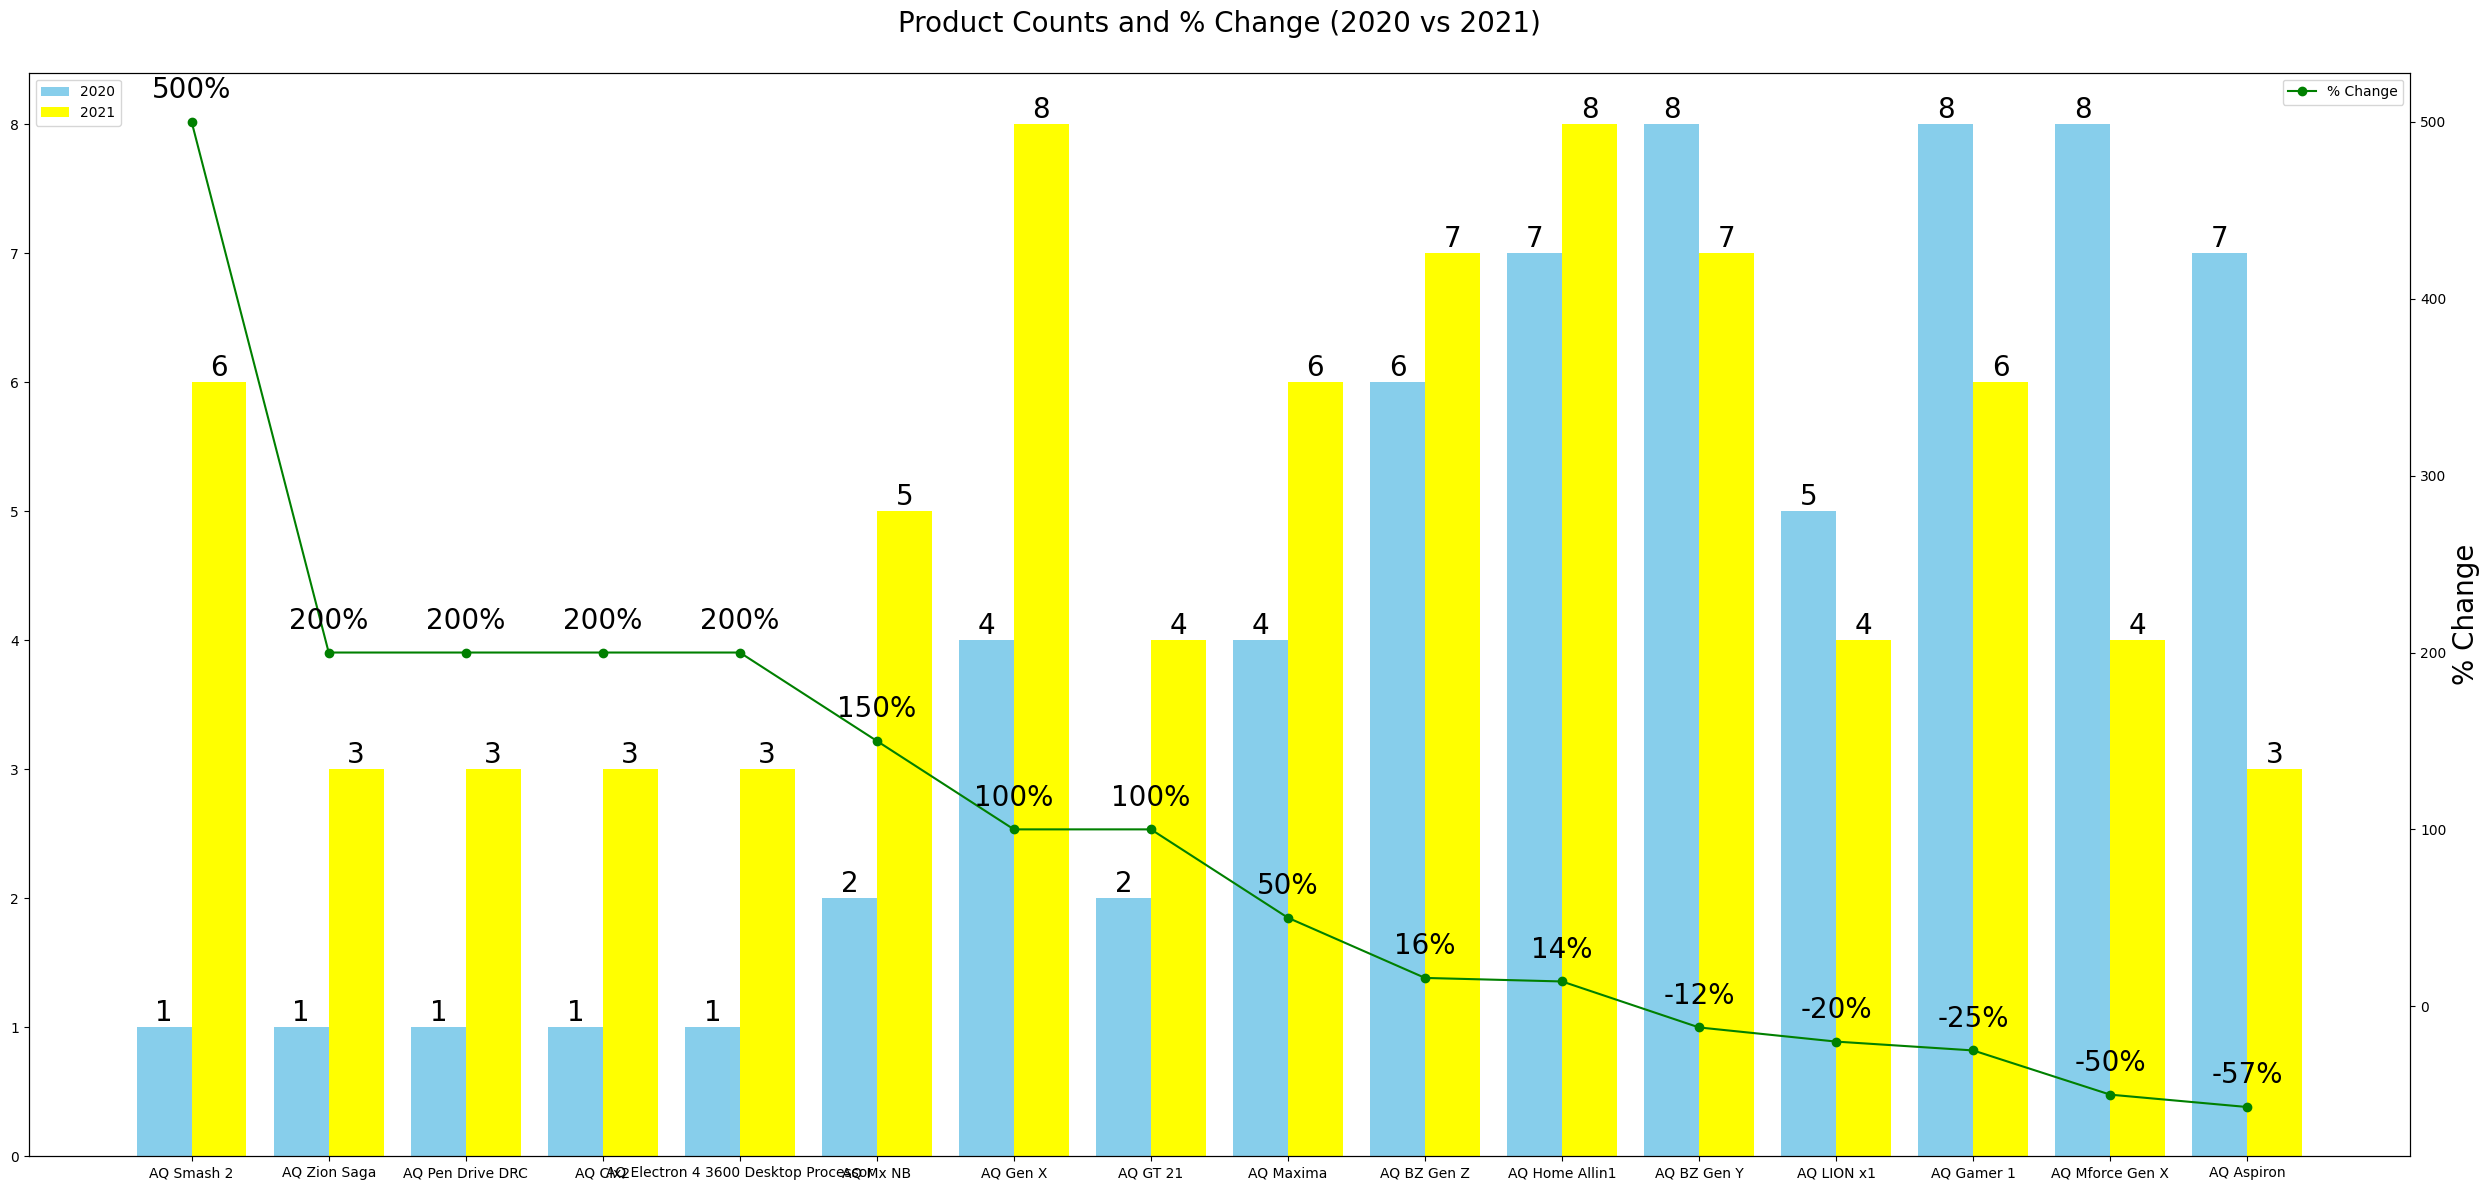

In [90]:
plt.figure(figsize=(25, 12))

df['pct_chg'] = pd.to_numeric(df['pct_chg'].str.rstrip('%'))
# Plot 2020 and 2021 counts
bar_width = 0.4
index = df.index
bars1 = plt.bar(df.index - bar_width/2, df['product_2020'], width=bar_width, color='skyblue', align='center', label='2020')
bars2 = plt.bar(df.index + bar_width/2, df['product_2021'], width=bar_width, color='yellow', align='center', label='2021')

# Data labels for 2020 and 2021 counts
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha='center', va='bottom',fontsize=20)

# Plot % change as a line plot
ax2 = plt.twinx()
line = ax2.plot(df.index, df['pct_chg'], color='g', marker='o', label='% Change')

# Data labels for % change
for i in range(len(df)):
    plt.text(df.index[i], df['pct_chg'][i] + 10, str(df['pct_chg'][i]) + '%', ha='center', va='bottom',fontsize=20)

# Add labels and legends
plt.xlabel('Product',fontsize=20)
plt.ylabel('Count',fontsize=20)
ax2.set_ylabel('% Change',fontsize=20)
plt.title('Product Counts and % Change (2020 vs 2021)\n',fontsize=20)


# Combine legend handles and labels
bars_legend = plt.legend(handles=[bars1, bars2], labels=['2020', '2021'], loc='upper left')
ax2_legend = plt.legend(handles=line, loc='upper right')
plt.gca().add_artist(bars_legend)
plt.xticks(df.index, df['product'],fontsize=20)
plt.xticks(rotation=90,ha='right')
# Show plot
plt.tight_layout()
plt.show()

In [17]:
# -- Provide a report with all the unique product counts for each segment and
# -- sort them in descending order of product counts. The final output contains
# -- 2 fields,
# -- segment
# -- product_count

segment_data="""select segment, count(distinct product) as total_Product
from dim_product
group by 1
order by 2 desc"""
cur.execute(segment_data)
segment_data=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(segment_data, columns=columns)
df


,segment,total_product
0,Accessories,20
1,Peripherals,20
2,Notebook,17
3,Storage,9
4,Desktop,4
5,Networking,3


C:\Users\Tushar Aggarwal\AppData\Local\Temp\ipykernel_15568\3030624352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='segment',y='total_product',palette=colors)
C:\Users\Tushar Aggarwal\AppData\Local\Temp\ipykernel_15568\3030624352.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data=df,x='segment',y='total_product',palette=colors)


[]

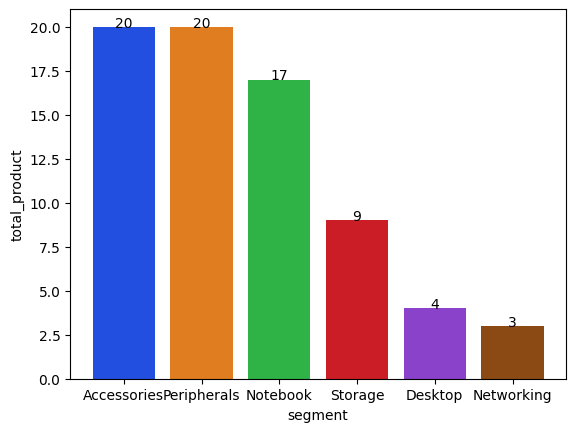

In [18]:
colors=sns.color_palette('bright')
sns.barplot(data=df,x='segment',y='total_product',palette=colors)
for index, row in df.iterrows():
    plt.text(index, row['total_product'], str(row['total_product']), color='black', ha="center")
plt.plot()

In [19]:
# --  Generate a report which contains the top 5 customers who received an
# -- average high pre_invoice_discount_pct for the fiscal year 2021 and in the
# -- Indian market. The final output contains these fields,
# -- customer_code
# -- customer
# -- average_discount_percentage

Top_5_cust="""select dc.customer_code,dc.customer,round(cast(avg(pre_invoice_discount_pct)  as numeric),2)as avg_pid
from dim_customer dc
join fact_pre_invoice_deductions fpid
on dc.customer_code=fpid.customer_code
where market='India' and fiscal_year=2021
group by 1,2
order by 3 desc
limit 5"""
cur.execute(Top_5_cust)
Top_5_cust=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(Top_5_cust, columns=columns)
df


,customer_code,customer,avg_pid
0,90002009,Flipkart,0.31
1,90002002,Croma,0.30
2,90002006,Viveks,0.30
3,90002003,Ezone,0.30
4,90002016,Amazon,0.29


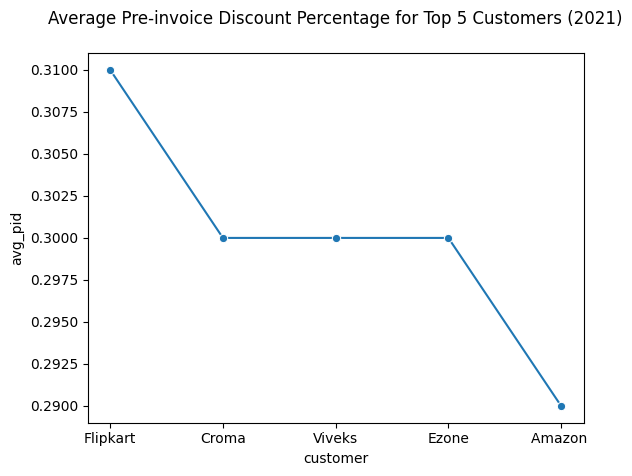

In [20]:
sns.lineplot(data=df,x='customer',y='avg_pid',marker='o')
plt.title('Average Pre-invoice Discount Percentage for Top 5 Customers (2021)\n')
plt.show()

In [61]:
# --  Get the complete report of the Gross sales amount for the customer “Atliq
# -- Exclusive” for each month. This analysis helps to get an idea of low and
# -- high-performing months and take strategic decisions.
# -- The final report contains these columns:
# -- Month
# -- Year
# -- Gross sales Amount
Gross_Sale_by_month=""" with cte as(
 select to_char(date,'Mon') as month,
 round(cast(sum(gross_price * fsm.sold_quantity)/1000000 as numeric),2) || ' Mn' as Gross_sale_2020
 from fact_gross_price fgp
 join fact_sales_monthly fsm
 on fgp.product_code=fsm.product_code
 and fgp.fiscal_year=fsm.fiscal_year
 join dim_customer dc
 on dc.customer_code=fsm.customer_code
 where customer='Atliq Exclusive' and fgp.fiscal_year=2020
 group by 1
 ),
 cte2 as( select to_char(date,'Mon') as month,
 round(cast(sum(gross_price * fsm.sold_quantity)/1000000 as numeric),2) || ' Mn' as Gross_sale_2021
 from fact_gross_price fgp
 join fact_sales_monthly fsm
 on fgp.product_code=fsm.product_code
 and fgp.fiscal_year=fsm.fiscal_year
 join dim_customer dc
 on dc.customer_code=fsm.customer_code
 where customer='Atliq Exclusive' and fgp.fiscal_year=2021
 group by 1)
 select cte.month,cte.Gross_sale_2020,cte2.Gross_sale_2021
 from cte
 join cte2
 on cte.month=cte2.month
 order by case cte.month
             WHEN 'Jan' THEN 1
             WHEN 'Feb' THEN 2
             WHEN 'Mar' THEN 3
             WHEN 'Apr' THEN 4
             WHEN 'May' THEN 5
             WHEN 'Jun' THEN 6
             WHEN 'Jul' THEN 7
             WHEN 'Aug' THEN 8
             WHEN 'Sep' THEN 9
             WHEN 'Oct' THEN 10
             WHEN 'Nov' THEN 11
             WHEN 'Dec' THEN 12
          END """
cur.execute(Gross_Sale_by_month)
Gross_Sale_by_month=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(Gross_Sale_by_month, columns=columns)
df

,month,gross_sale_2020,gross_sale_2021
0,Jan,4.74 Mn,12.40 Mn
1,Feb,4.00 Mn,10.13 Mn
2,Mar,0.38 Mn,12.14 Mn
3,Apr,0.40 Mn,7.31 Mn
4,May,0.78 Mn,12.15 Mn
5,Jun,1.70 Mn,9.82 Mn
6,Jul,2.55 Mn,12.09 Mn
7,Aug,2.79 Mn,7.18 Mn
8,Sep,4.50 Mn,12.35 Mn
9,Oct,5.14 Mn,13.22 Mn


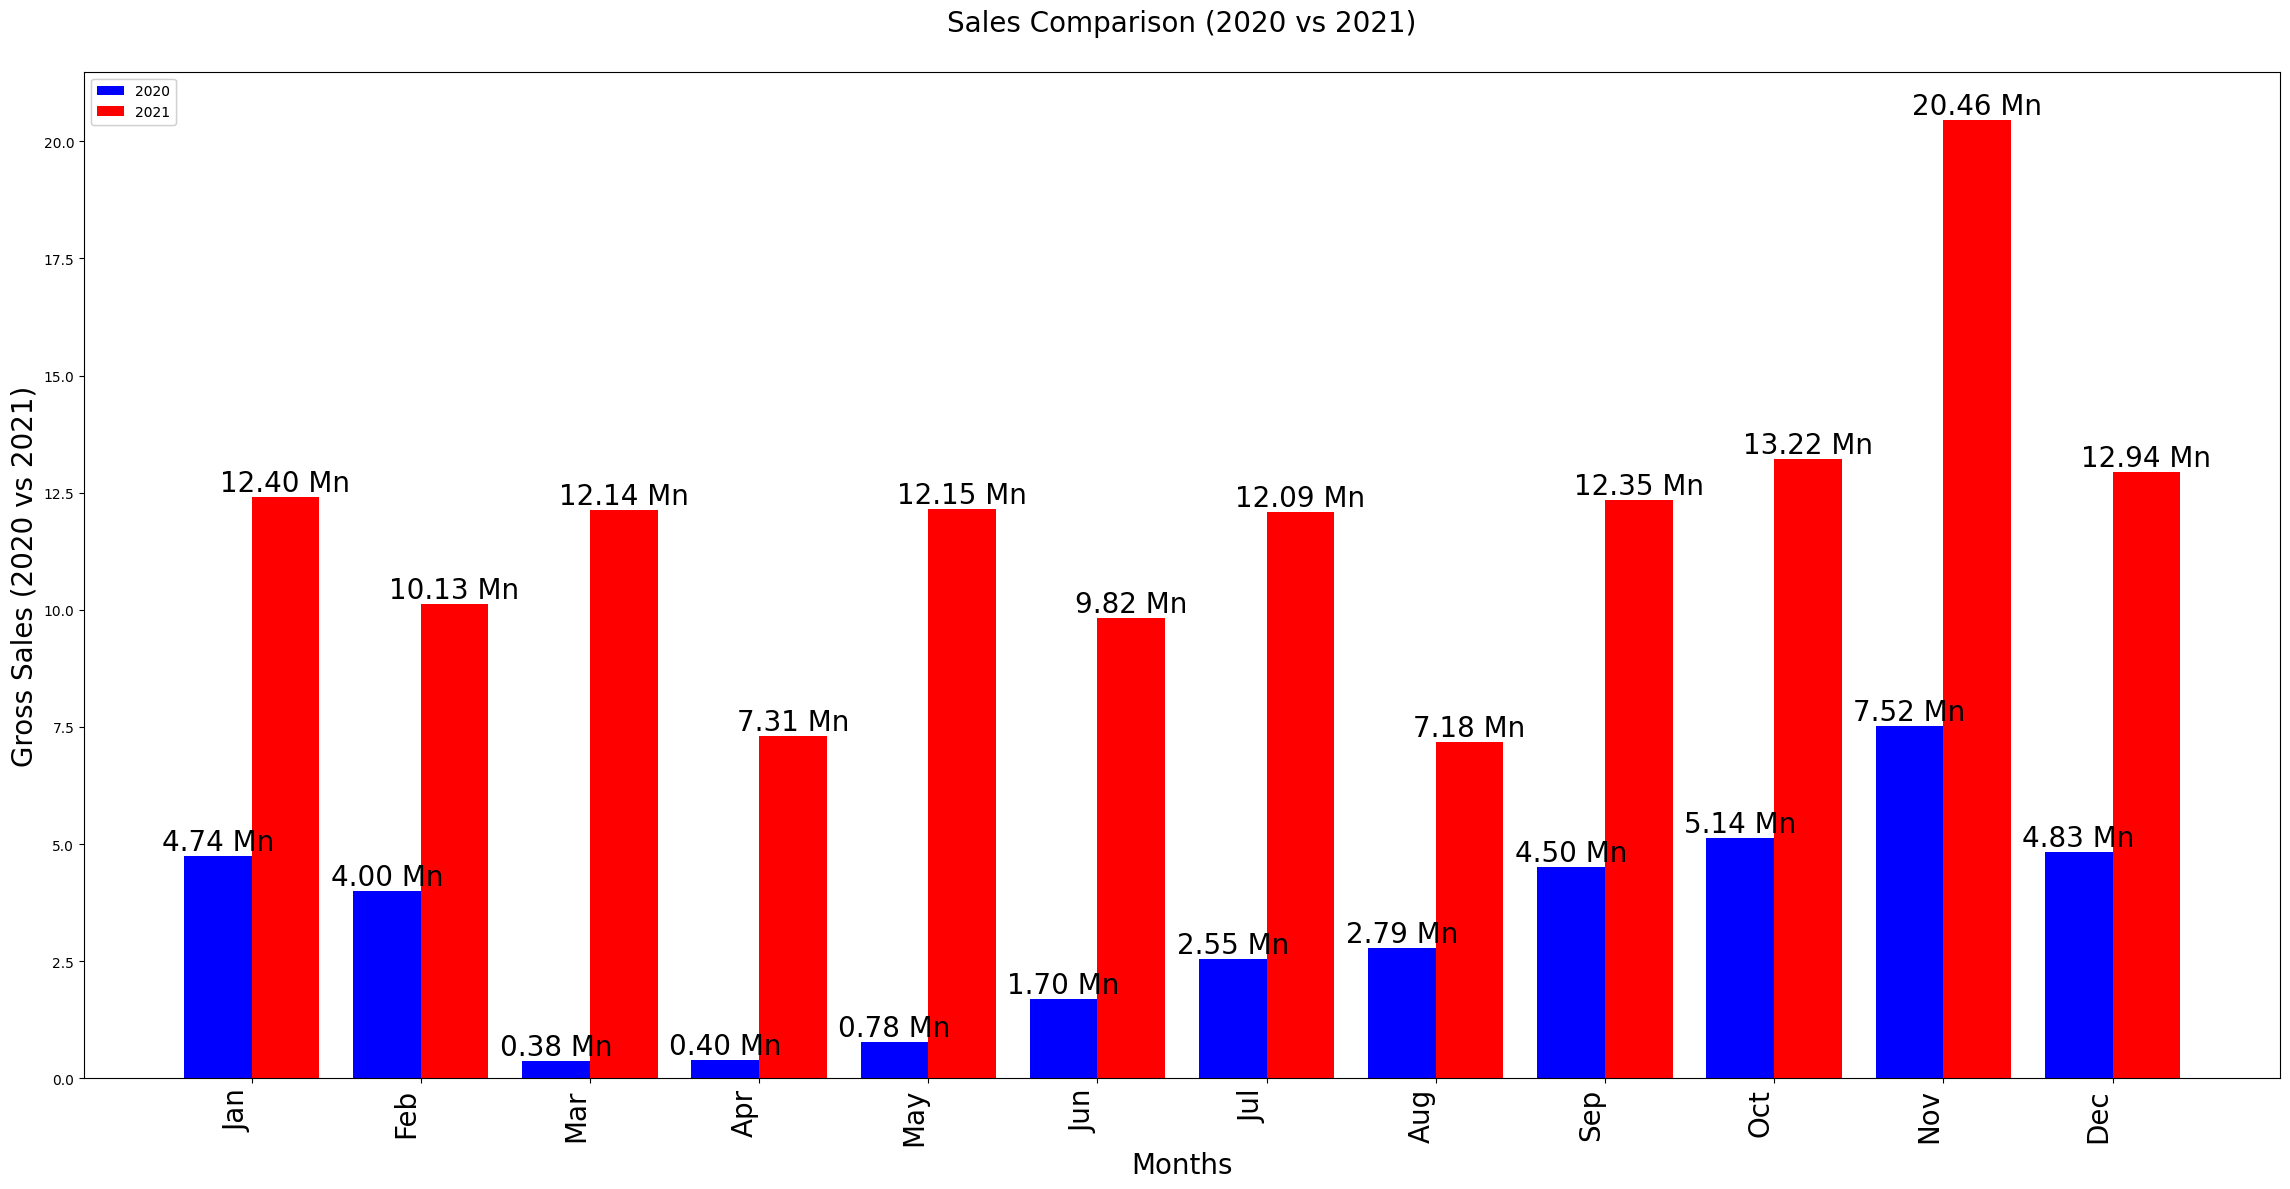

In [77]:
# df['gross_sale_2020'] = df['gross_sale_2020'].str.replace(' Mn', '').astype(float)
# df['gross_sale_2021'] = df['gross_sale_2021'].str.replace(' Mn', '').astype(float)

plt.figure(figsize=(23, 12))

# Plot 2020 and 2021 counts
bar_width = 0.4
index = df.index
bars1 = plt.bar(df.index - bar_width/2, df['gross_sale_2020'], width=bar_width, color='blue', align='center', label='2020')
bars2 = plt.bar(df.index + bar_width/2, df['gross_sale_2021'], width=bar_width, color='red', align='center', label='2021')

# Data labels for 2020 counts
for i, value in enumerate(df['gross_sale_2020']):
    plt.text(i - bar_width/2, value, '%.2f Mn' % value, ha='center', va='bottom', fontsize=20, color='black')

# Data labels for 2021 counts
for i, value in enumerate(df['gross_sale_2021']):
    plt.text(i + bar_width/2, value, '%.2f Mn' % value, ha='center', va='bottom', fontsize=20, color='black')

# Add labels and legends
plt.xlabel('Months', fontsize=20)
plt.ylabel('Gross Sales (2020 vs 2021)', fontsize=20)
plt.title('Sales Comparison (2020 vs 2021)\n', fontsize=20)

# Combine legend handles and labels
bars_legend = plt.legend(handles=[bars1, bars2], labels=['2020', '2021'], loc='upper left')
plt.gca().add_artist(bars_legend)
plt.xticks(df.index, df['month'], fontsize=20, rotation=90, ha='right')

# Show plot
plt.tight_layout()
plt.show()



In [23]:
# --  In which quarter of 2020, got the maximum total_sold_quantity? The final
# -- output contains these fields sorted by the total_sold_quantity,
# -- Quarter
# -- total_sold_quantity
quarter="""
select 'Q'|| date_part('Quarter',date) as quarter,
sum(sold_quantity) as total_sold_quantity,
sum(sold_quantity)/100000 || ' L' as approx_total_sold_quantity
from fact_sales_monthly
where fiscal_year=2020
group by 1
order by 2 desc"""
cur.execute(quarter)
quarter=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(quarter, columns=columns)
df

,quarter,total_sold_quantity,approx_total_sold_quantity
0,Q4,8425822,84 L
1,Q3,5246770,52 L
2,Q1,3704398,37 L
3,Q2,3395899,33 L


[]

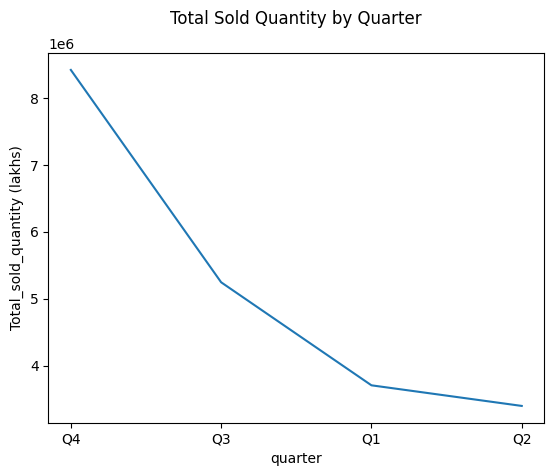

In [24]:
sns.lineplot(data=df,x='quarter',y='total_sold_quantity')
plt.title('Total Sold Quantity by Quarter\n')
plt.ylabel('Total_sold_quantity (lakhs)')
plt.plot()

In [79]:
# -- . Which channel helped to bring more gross sales in the fiscal year 2021
# -- and the percentage of contribution? The final output contains these fields,
# -- channel
# -- gross_sales_mln
# -- percentage
gross_sale_with_percentage="""with cte as(
select dc.channel,round(cast(sum(fgp.gross_price * fsm.sold_quantity)as numeric)/1000000,2) as total_gross_sale
from fact_gross_price fgp
join fact_sales_monthly fsm
on fgp.product_code=fsm.product_code and fgp.fiscal_year=fsm.fiscal_year
join dim_customer dc
on dc.customer_code=fsm.customer_code
where fgp.fiscal_year=2021
group by 1
order by 2 desc),
cte2 as(
select sum(total_gross_sale) as total
from cte)
select channel,total_gross_sale || ' Mn' as gross_sale,
round(cast((total_gross_sale*100/total)as numeric),2) || '%' as pct_contribution
from cte
cross join
cte2"""
cur.execute(gross_sale_with_percentage)
gross_sale_with_percentage=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(gross_sale_with_percentage, columns=columns)
df

,channel,gross_sale,pct_contribution
0,Retailer,1219.08 Mn,73.23%
1,Direct,257.53 Mn,15.47%
2,Distributor,188.03 Mn,11.30%


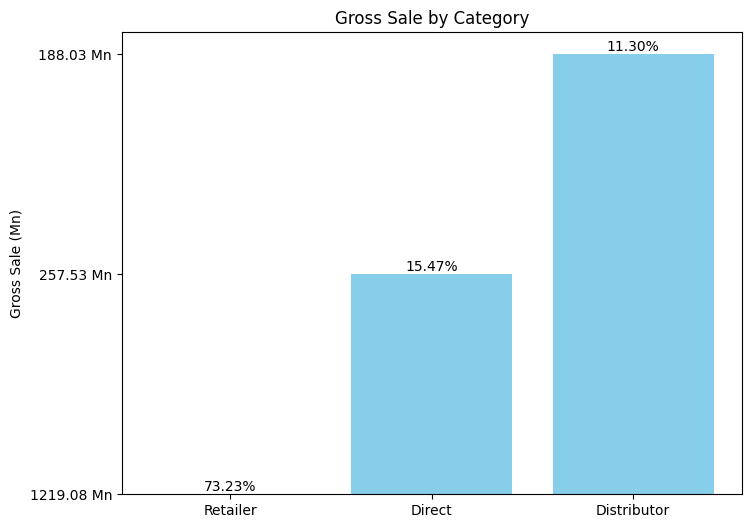

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(df['channel'], df['gross_sale'], color='skyblue')
df['pct_contribution'] = pd.to_numeric(df['pct_contribution'].str.rstrip('%'))
# Add text annotations for percentages above each bar
for bar, percentage in zip(bars, df['pct_contribution']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Add labels and title
ax.set_ylabel('Gross Sale (Mn)')
ax.set_title('Gross Sale by Category')

# Show plot
plt.show()

In [83]:
# -- Get the Top 3 products in each division that have a high
# -- total_sold_quantity in the fiscal_year 2021? The final output contains these
# -- fields,
# -- division
# -- product_code
top_3_products="""
with cte as(
select division,product,sum(sold_quantity) as total_sold_quantity
from dim_product dp
join fact_sales_monthly fsm
on dp.product_code=fsm.product_code
group by 1,2),
cte2 as
(select division,product,total_sold_quantity,
 dense_rank() over(partition by division order by total_sold_quantity desc) as rank
from cte)
select division,product,total_sold_quantity
from cte2
where rank<=3"""
cur.execute(top_3_products)
top_3_products=cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(top_3_products, columns=columns)
df

,division,product,total_sold_quantity
0,N & S,AQ Pen Drive DRC,2492352
1,N & S,AQ Clx1,2173811
2,N & S,AQ Digit SSD,2160254
3,P & A,AQ Gamers Ms,4043543
4,P & A,AQ Master wired x1 Ms,4025721
5,P & A,AQ Master wireless x1 Ms,4012628
6,PC,AQ Digit,203954
7,PC,AQ Elite,202272
8,PC,AQ Gen X,168489


C:\Users\Tushar Aggarwal\AppData\Local\Temp\ipykernel_15568\37040601.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


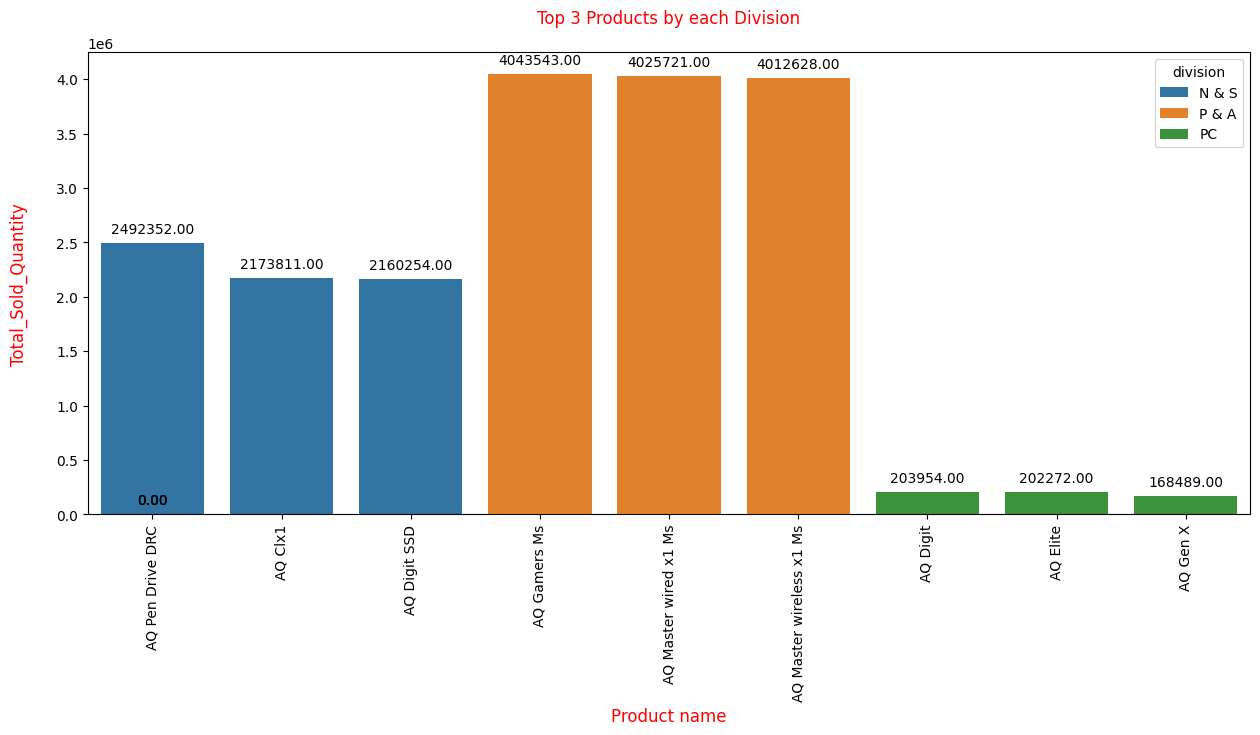

In [86]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df, x='product', y='total_sold_quantity', hue='division')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Product name", fontsize=12, color='red')
plt.ylabel("Total_Sold_Quantity", fontsize=12, labelpad=20, color='red')
plt.title("Top 3 Products by each Division\n", fontsize=12, color='red')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=10)

plt.show()
